In [1]:
import os
import tensorflow as tf

from lob.lob_gan import *

%load_ext autoreload
%autoreload 2

imported at 2025-04-20 01:04:19.497339


In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
RAW_DATA = pd.read_parquet('lob/BTCUSDT-lob.parq', engine='pyarrow')
assert RAW_DATA.notna().all(axis=None)
RAW_DATA

,E,T,U,u,pu,b0p,b1p,b2p,b3p,b4p,...,a0q,a1q,a2q,a3q,a4q,a5q,a6q,a7q,a8q,a9q
0,1739868923498,1739868923498,6783640382776,6783640393900,6783640382281,95179.9,95179.5,95179.0,95178.7,95178.0,...,8.937,0.190,0.036,0.002,0.095,0.002,0.002,0.002,0.158,0.002
1,1739868923614,1739868923610,6783640396586,6783640404328,6783640393900,95179.9,95179.5,95179.0,95178.7,95178.0,...,8.953,0.154,0.002,0.095,0.002,0.002,0.002,0.158,0.002,0.002
2,1739868923724,1739868923721,6783640405138,6783640420666,6783640404328,95179.9,95179.5,95179.0,95178.7,95178.0,...,8.953,0.154,0.042,0.002,0.095,0.002,0.002,0.002,0.158,0.004
3,1739868923827,1739868923821,6783640421340,6783640434389,6783640420666,95179.9,95179.5,95179.0,95178.7,95178.0,...,8.953,0.154,0.042,0.002,0.095,0.002,0.002,0.002,0.158,0.004
4,1739868923948,1739868923946,6783640436896,6783640445572,6783640434389,95179.9,95179.5,95179.0,95178.7,95178.0,...,8.957,0.154,0.042,0.002,0.095,0.002,0.002,0.002,0.158,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189755,1739937377488,1739937377486,6791359179849,6791359186272,6791359179542,95733.3,95733.2,95733.1,95733.0,95732.9,...,0.884,0.007,0.002,0.014,0.050,0.002,0.002,0.002,0.002,0.010
189756,1739937377596,1739937377595,6791359186752,6791359194092,6791359186272,95733.3,95733.2,95733.1,95733.0,95732.9,...,1.438,0.007,0.002,0.014,0.050,0.002,0.002,0.002,0.002,0.010
189757,1739937377698,1739937377697,6791359194379,6791359202977,6791359194092,95733.3,95733.2,95733.1,95733.0,95732.9,...,5.604,0.007,0.002,0.014,0.002,0.050,0.002,0.002,0.002,0.002
189758,1739937377806,1739937377806,6791359203537,6791359209077,6791359202977,95733.3,95733.2,95733.1,95733.0,95732.9,...,5.453,0.007,0.002,0.014,0.002,0.050,0.002,0.002,0.002,0.002


In [4]:
%%time

SAMPLE_SIZE = min(len(RAW_DATA), Configs().sample_size)
BATCH_SIZE = SAMPLE_SIZE // Configs().n_batches

LOB_DATASET = create_dataset(RAW_DATA, sample_size=SAMPLE_SIZE, batch_size=BATCH_SIZE)

CPU times: user 20.7 ms, sys: 8.84 ms, total: 29.5 ms
Wall time: 28.5 ms


{'neg_qty_sum': 0.0,
 'neg_qty_count': 0.0,
 'neg_diff_sum': 0.0,
 'neg_diff_count': 0.0}

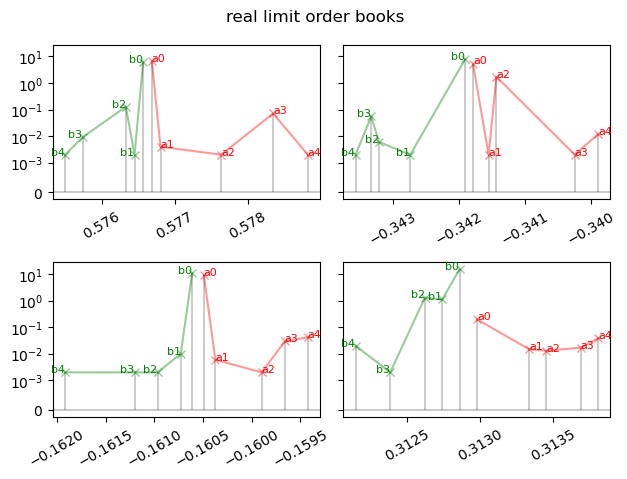

CPU times: user 1.09 s, sys: 86.4 ms, total: 1.17 s
Wall time: 522 ms


In [5]:
%%time

for i, batch in enumerate(LOB_DATASET):
    ss = calculate_sample_stats(batch)
    display(ss)
    f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharey=True)
    f.suptitle('real limit order books')
    plot_lob_snapshot(batch[0], ax0)
    plot_lob_snapshot(batch[1], ax1)
    plot_lob_snapshot(batch[2], ax2)
    plot_lob_snapshot(batch[3], ax3)
    plt.tight_layout()
    plt.show()
    break

In [6]:
# gan = ImprovedGAN(RAW_DATA, Configs())
# outputs = gan.train()
# plot_training_history(outputs.metrics)
# plot_lobs(outputs.lobs)

batch_size=1250


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 64/64 [01:09<00:00,  1.09s/it]

Training completed in 1.16 minutes
plot_training_history


,disc_loss,real_loss,fake_loss,gen_loss,adv_loss,fm_loss_h,fm_loss_e,real_prob,fake_prob,neg_qty_sum,neg_qty_count,neg_diff_sum,neg_diff_count
0,1.455045,0.970916,0.484129,6791.580246,5.046529,6772.470520,14.063158,0.490051,0.623191,0.030479,0.2584,1.679259,7.1504
1,0.713130,0.364664,0.348466,1142.704987,3.557545,1125.218822,13.928621,0.726977,0.710749,0.004985,0.0592,0.456745,2.8448
2,0.375835,0.163553,0.212282,432.791243,2.165865,416.738695,13.886687,0.860950,0.812168,0.003160,0.0352,0.211403,1.6856
3,0.221381,0.100345,0.121037,304.954997,1.225355,290.009431,13.720208,0.911364,0.887881,0.003648,0.0408,0.134711,1.2032
4,0.142383,0.072496,0.069887,269.452151,0.702075,255.195293,13.554784,0.934671,0.933590,0.003980,0.0424,0.107098,0.9920
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.004721,0.002563,0.002158,60.752413,0.019554,45.417802,15.315057,0.997503,0.997854,0.011717,0.1368,0.034383,0.4144
60,0.004545,0.002488,0.002057,60.570107,0.018633,45.388336,15.163138,0.997576,0.997954,0.016637,0.1744,0.034470,0.4152
61,0.004394,0.002416,0.001977,60.372789,0.017926,45.387220,14.967642,0.997646,0.998033,0.016156,0.1680,0.034563,0.4144
62,0.004222,0.002348,0.001874,60.215040,0.017037,45.343330,14.854674,0.997711,0.998136,0.014749,0.1640,0.034646,0.4160


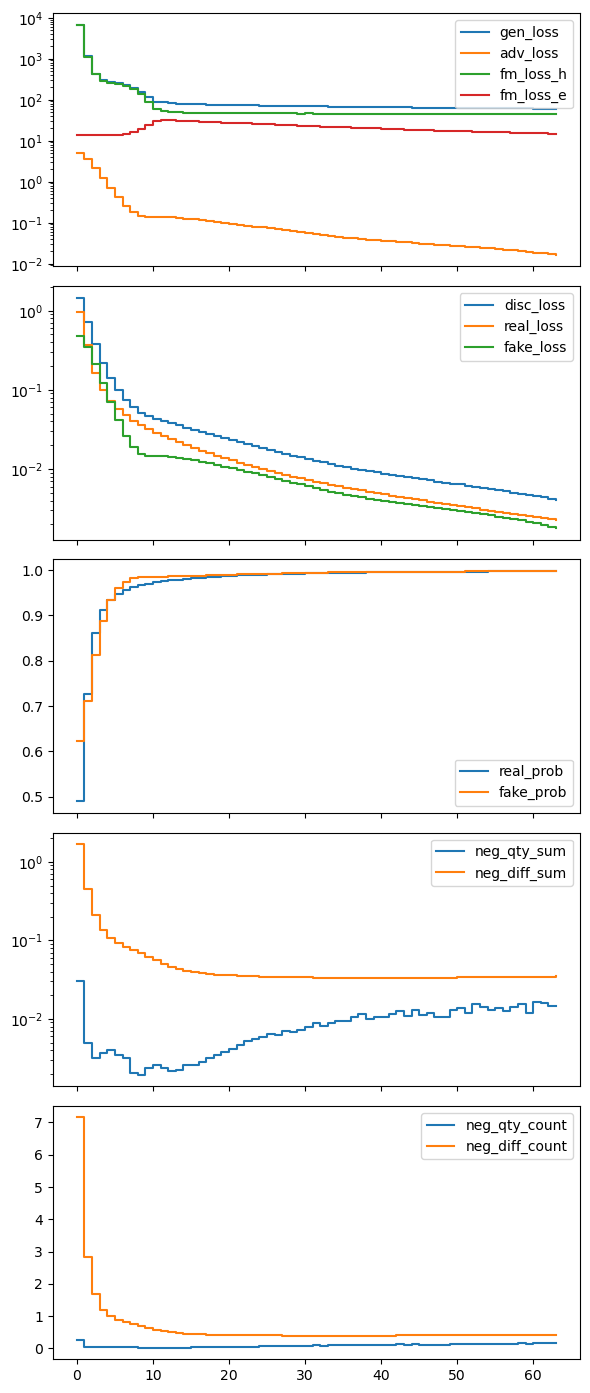

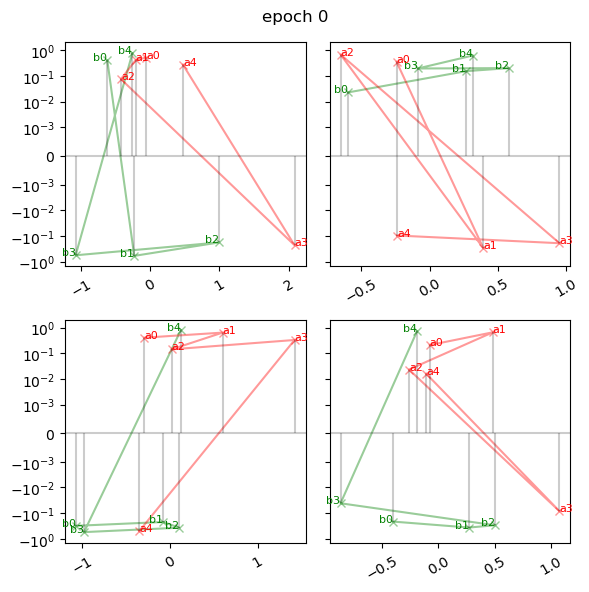

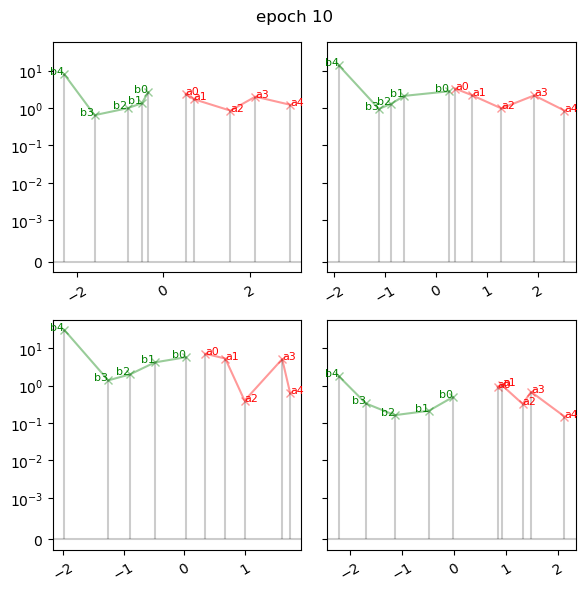

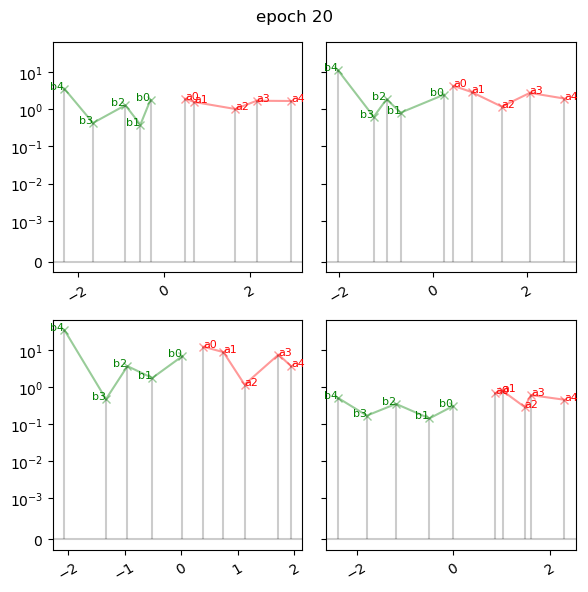

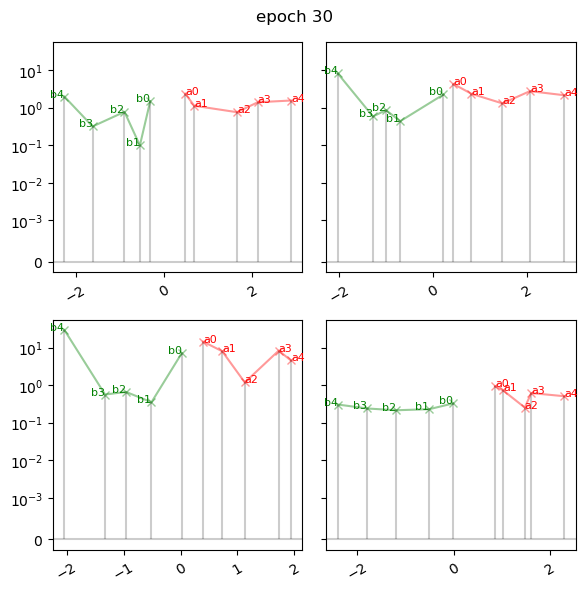

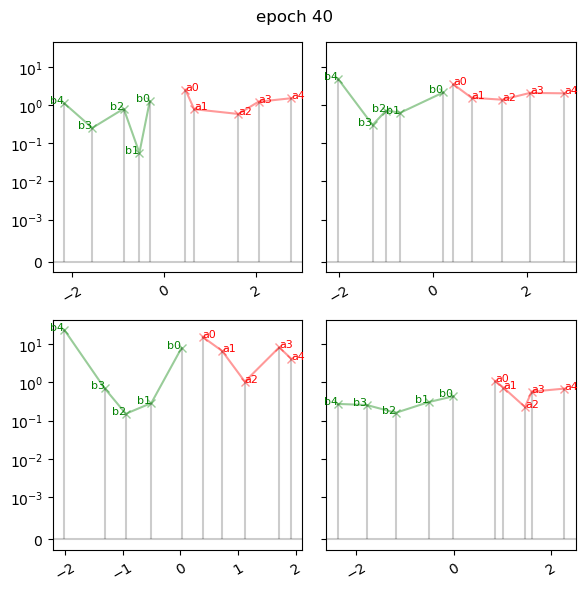

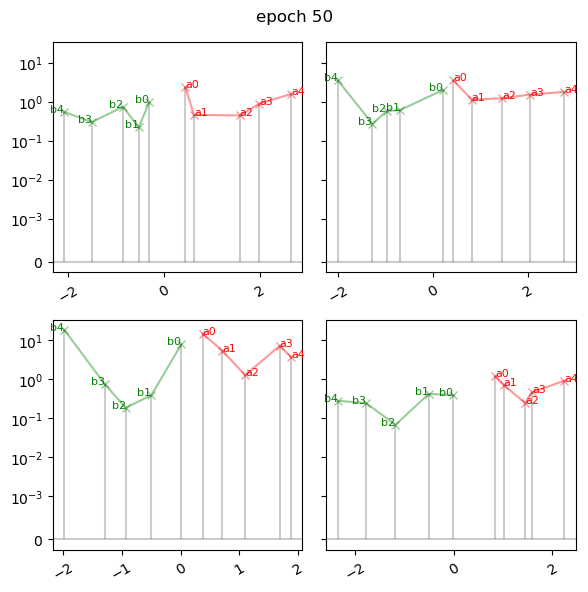

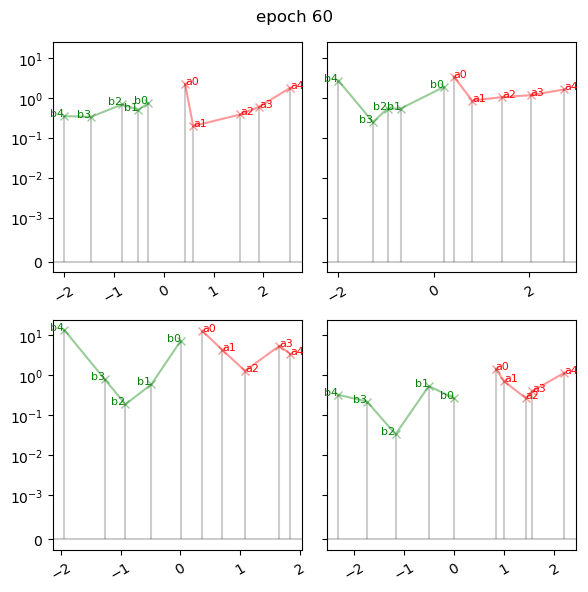

In [7]:
gan = ImprovedGAN(RAW_DATA, Configs(fm_weight_h=1.0, fm_weight_e=1.0))
outputs = gan.train()
plot_training_history(outputs.metrics)
plot_lobs(outputs.lobs)